### Tatiana Arenas Suárez
## TP2

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.
<br>
* 1.Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.
<br>
* 2.Usando el método descrito en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
<br>
* 3.Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

In [42]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib 

Using matplotlib backend: module://matplotlib_inline.backend_inline


# Punto 1

In [33]:
def gaussian_filter(h:int,w:int,k_size,sigma):
        
    if k_size % 2 == 0:
        raise ValueError("El tamaño debe ser un número impar")
    # se crea el kernel gaussiano
    ax = np.arange(-k_size // 2 + 1, k_size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    kernel = kernel / np.sum(kernel)
    # se hace padding al kernel para qeu quede con el mismo tamaño de la imgaen
    pad_zero = np.zeros([h,w])
    pad_height = (h - k_size) // 2
    pad_width = (w- k_size) // 2
    pad_zero[pad_height:pad_height+k_size, pad_width:pad_width+k_size] = kernel
    # se aplica la FFT
    fft_kernel = np.fft.fft2(pad_zero)

    return pad_zero, fft_kernel 
   

Se grafica con diferentes sigmas el kernel y el FFT.

<Figure size 1200x1200 with 0 Axes>

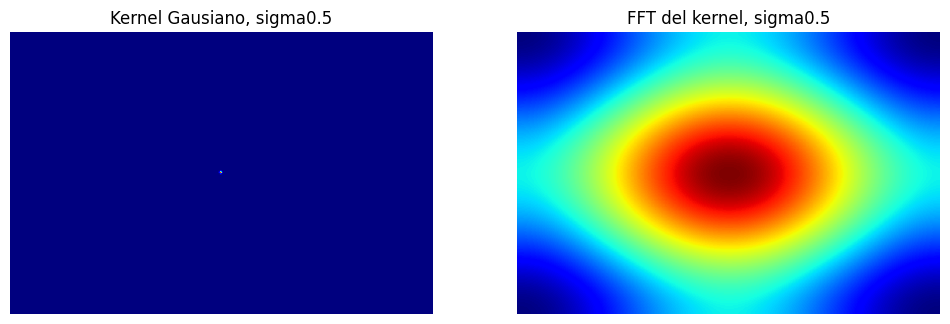

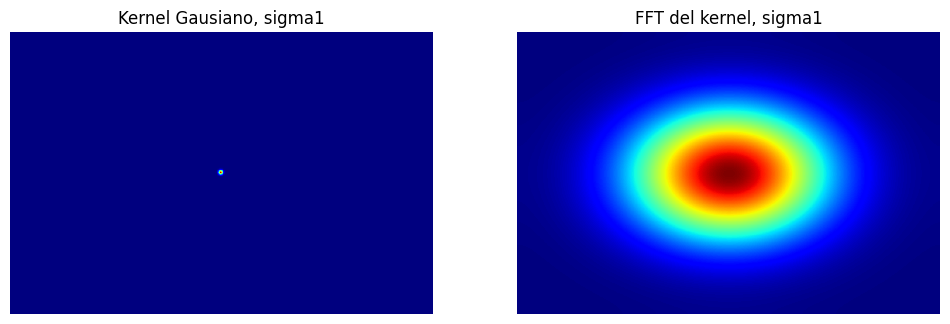

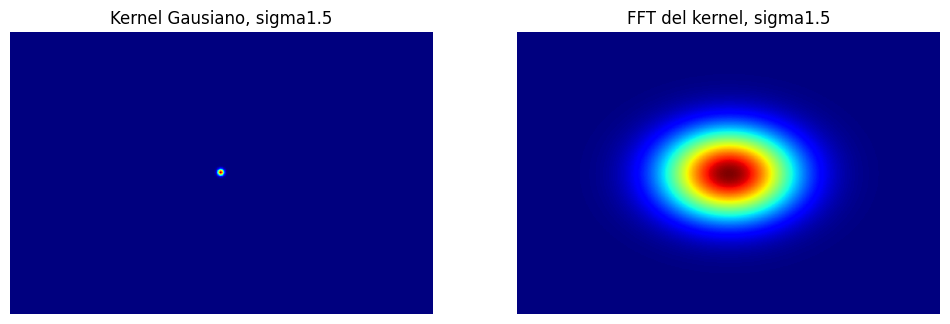

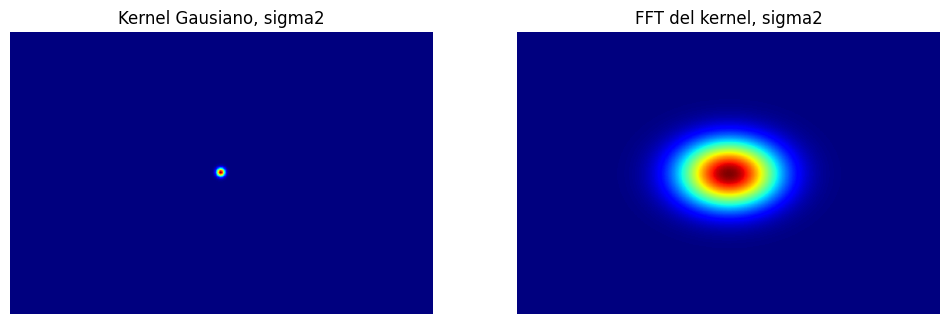

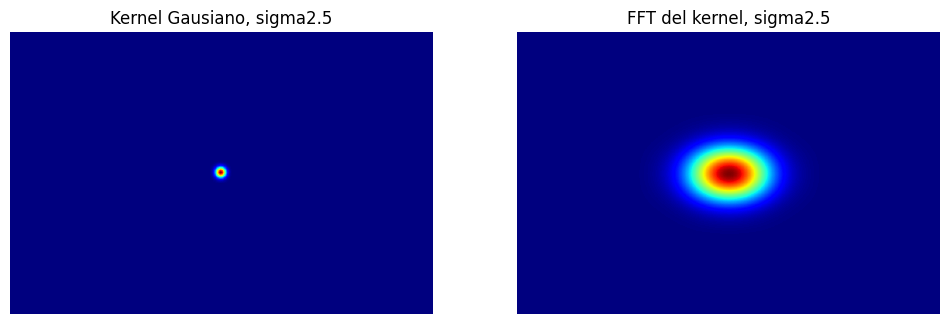

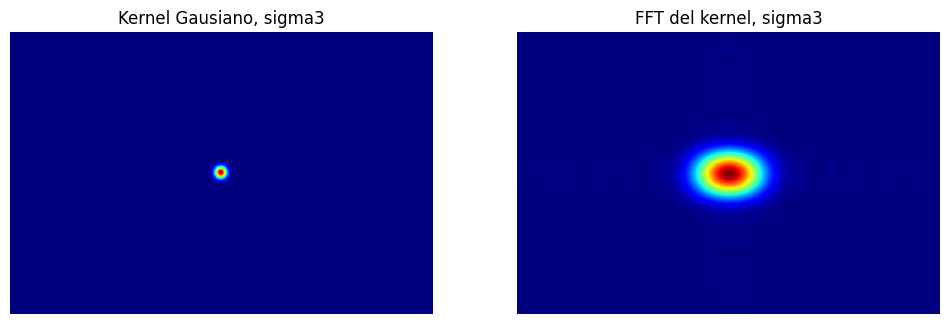

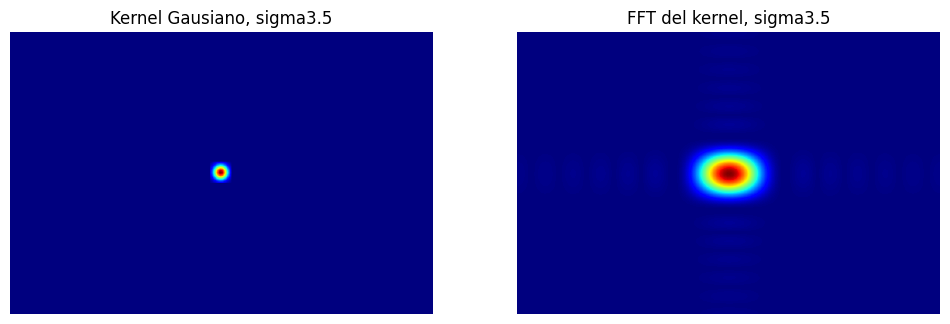

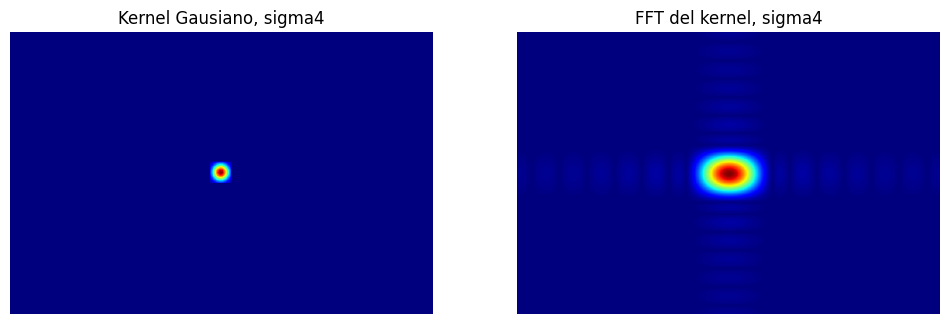

In [34]:
sigmas = [0.5,1,1.5,2,2.5,3,3.5,4]
plt.figure(figsize=(12,12))

for i, sig in enumerate(sigmas): 

    kernel, kernel_tf = gaussian_filter(h=200,w=300, k_size=15, sigma=sig)

    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title(f"Kernel Gausiano, sigma{sig}")
    plt.imshow(kernel, cmap='jet')

    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title(f"FFT del kernel, sigma{sig}")
    tf_shifted = np.fft.fftshift(kernel_tf) # se centra la transformada
    plt.imshow(np.abs(tf_shifted), cmap='jet')

Se varia el tamaño del kernel y se deja un sigma de 2.

<Figure size 1200x1200 with 0 Axes>

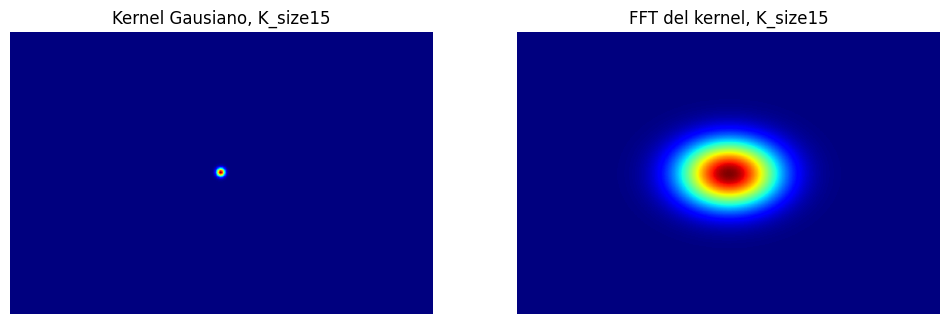

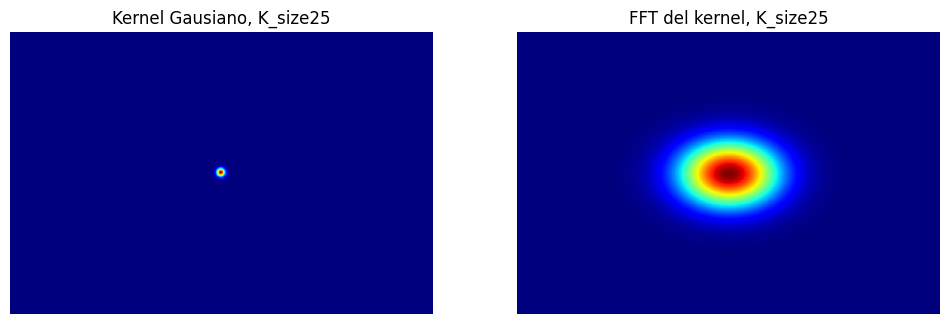

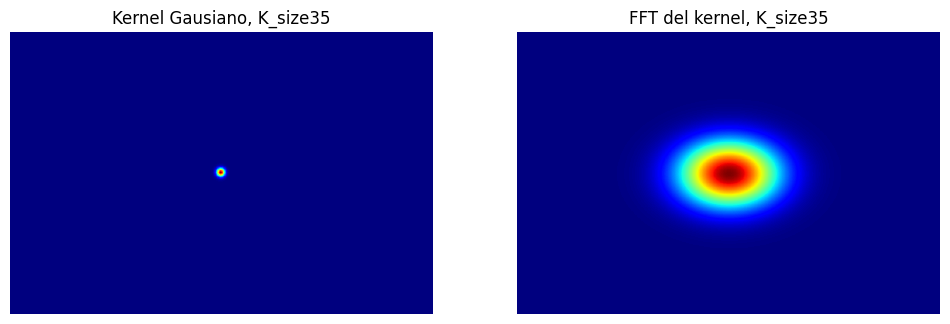

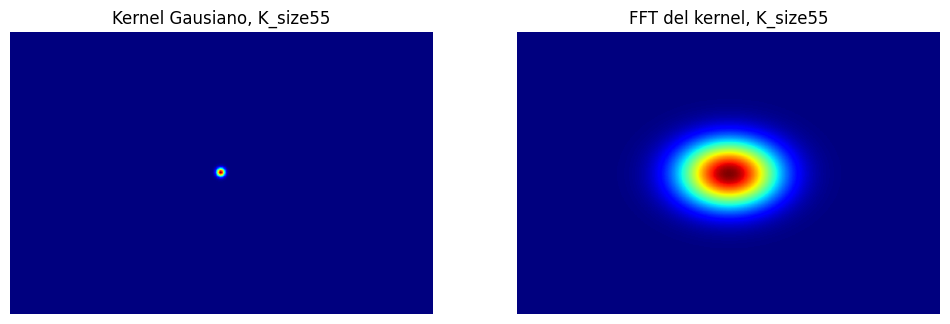

In [35]:
ker_size = [15,25,35,55]

plt.figure(figsize=(12,12))

for i, ker in enumerate(ker_size): 

    kernel, kernel_tf = gaussian_filter(h=200,w=300, k_size=ker, sigma=2)

    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title(f"Kernel Gausiano, K_size{ker}")
    plt.imshow(kernel, cmap='jet')

    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title(f"FFT del kernel, K_size{ker}")
    tf_shifted = np.fft.fftshift(kernel_tf) # se centra la transformada
    plt.imshow((np.abs(tf_shifted)), cmap='jet')

Se aplica el filtro gaussiano a la imagen de Jean Gray.

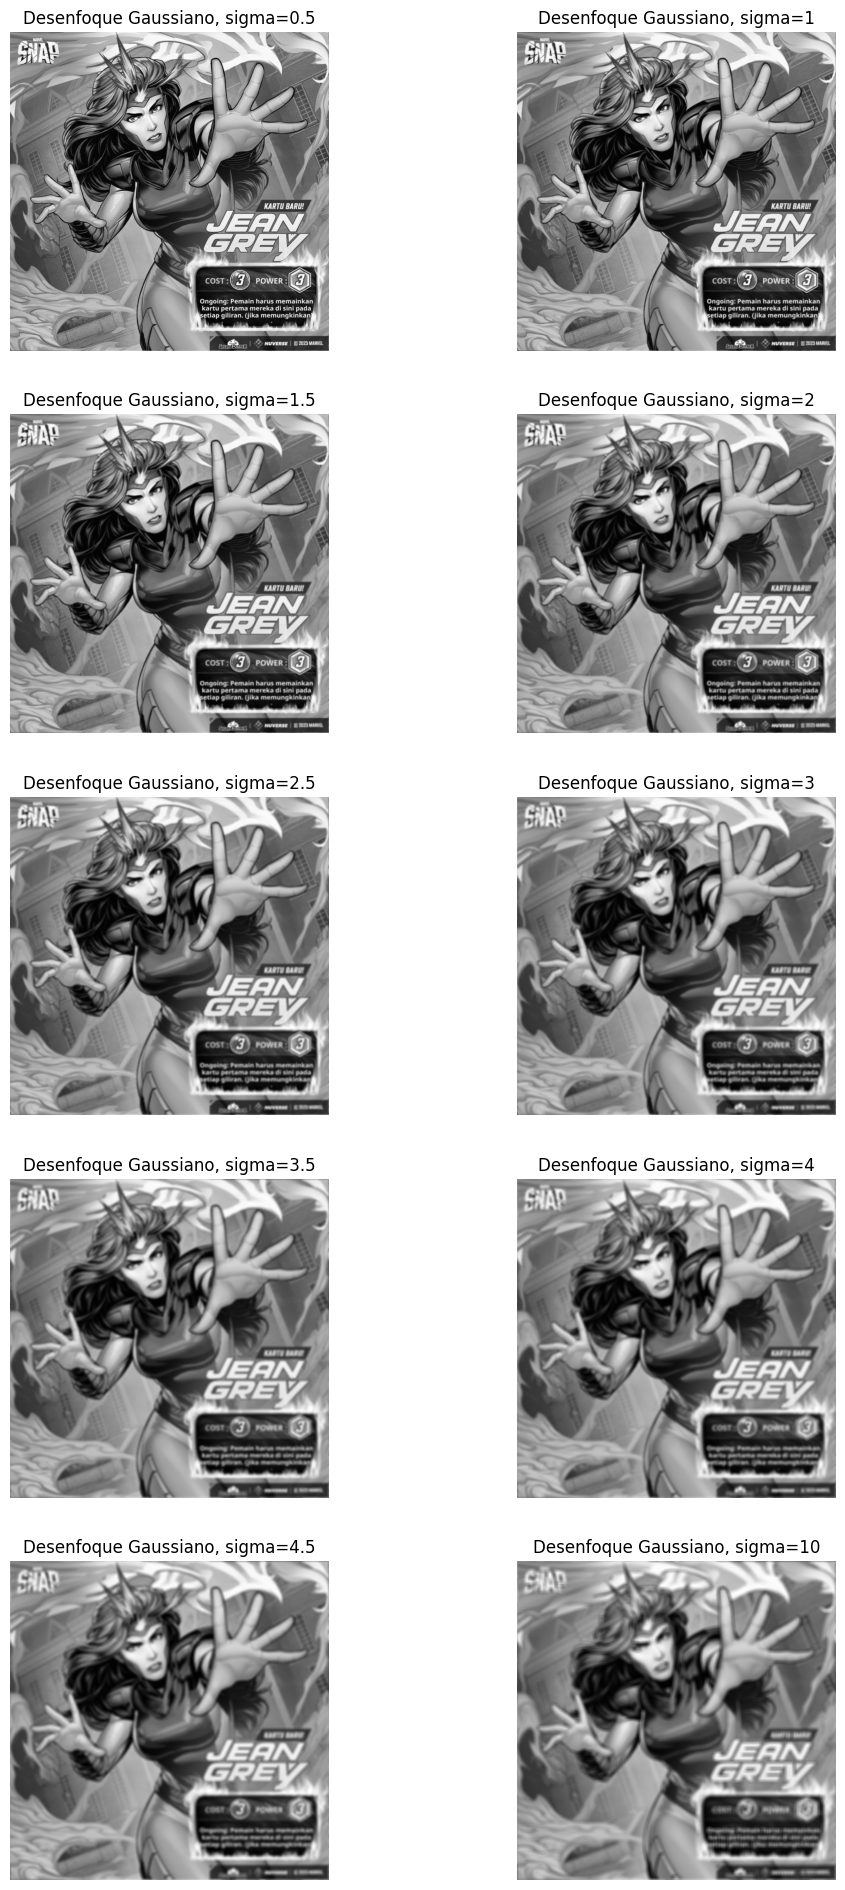

In [36]:
# apliación a una imagen

img = cv.imread('jean.jpg', cv.IMREAD_GRAYSCALE)
h, w = img.shape
img_fft = np.fft.fft2(img)

sigmas = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,10]

plt.figure(figsize=(12,24))

for i, sig in enumerate(sigmas): 

    kernel, kernel_tf = gaussian_filter(h=h,w=w, k_size=15, sigma=sig)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    plt.subplot(5, 2, i + 1)
    plt.axis('off')
    plt.title(f"Desenfoque Gaussiano, sigma={sig}")
    plt.imshow(img_gauss, cmap='gray')


In [49]:
# función para aplicar filtro gaussiano a cualquier imagen
def fourier_filter(image,k_size,sigma):  
    h, w = image.shape
    img_fft = np.fft.fft2(image)
    kernel, kernel_tf = gaussian_filter(h=h,w=w, k_size=k_size, sigma=sig)
    filtered = img_fft * kernel_tf 
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    return img_gauss

# Punto 2

**Algorithm for calculating Image Quality measure**
 
Input: Image I of size M×N.  
 
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure 
 
* Step 1: Compute F which is the Fourier Transform representation of image I   
 
* Step 2:  Find Fc which is obtained by shifting the origin of F to centre. 
 
* Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I. 
 
* Step 4:  Calculate M = max (AF) where M is the maximum value of the frequency component in F. 
 
* Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000. 
 
* Step 6: Calculate Image Quality measure (FM) from equation (1).

In [79]:
# Generalización
def quality_measure(images): 

    img_fft_shift = np.fft.ifftshift(np.fft.fft2(images))
    abs_shift = np.abs(img_fft_shift)#.astype(np.uint8)
    max_f = abs_shift.max()
    max_pix = abs_shift[abs_shift > max_f / 1000].size
    quality = max_pix / images.size

    return quality

  
    

Sele applicará el método descrito en la imágen convolucionada con el GaussianBlur de opencv y la imagen filtrada en el dominio de la frecuencia con el método propio. Se usará la imagen de magma.

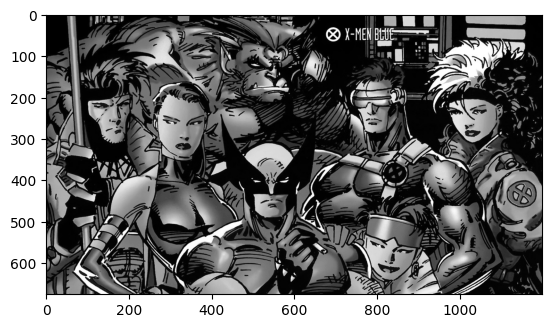

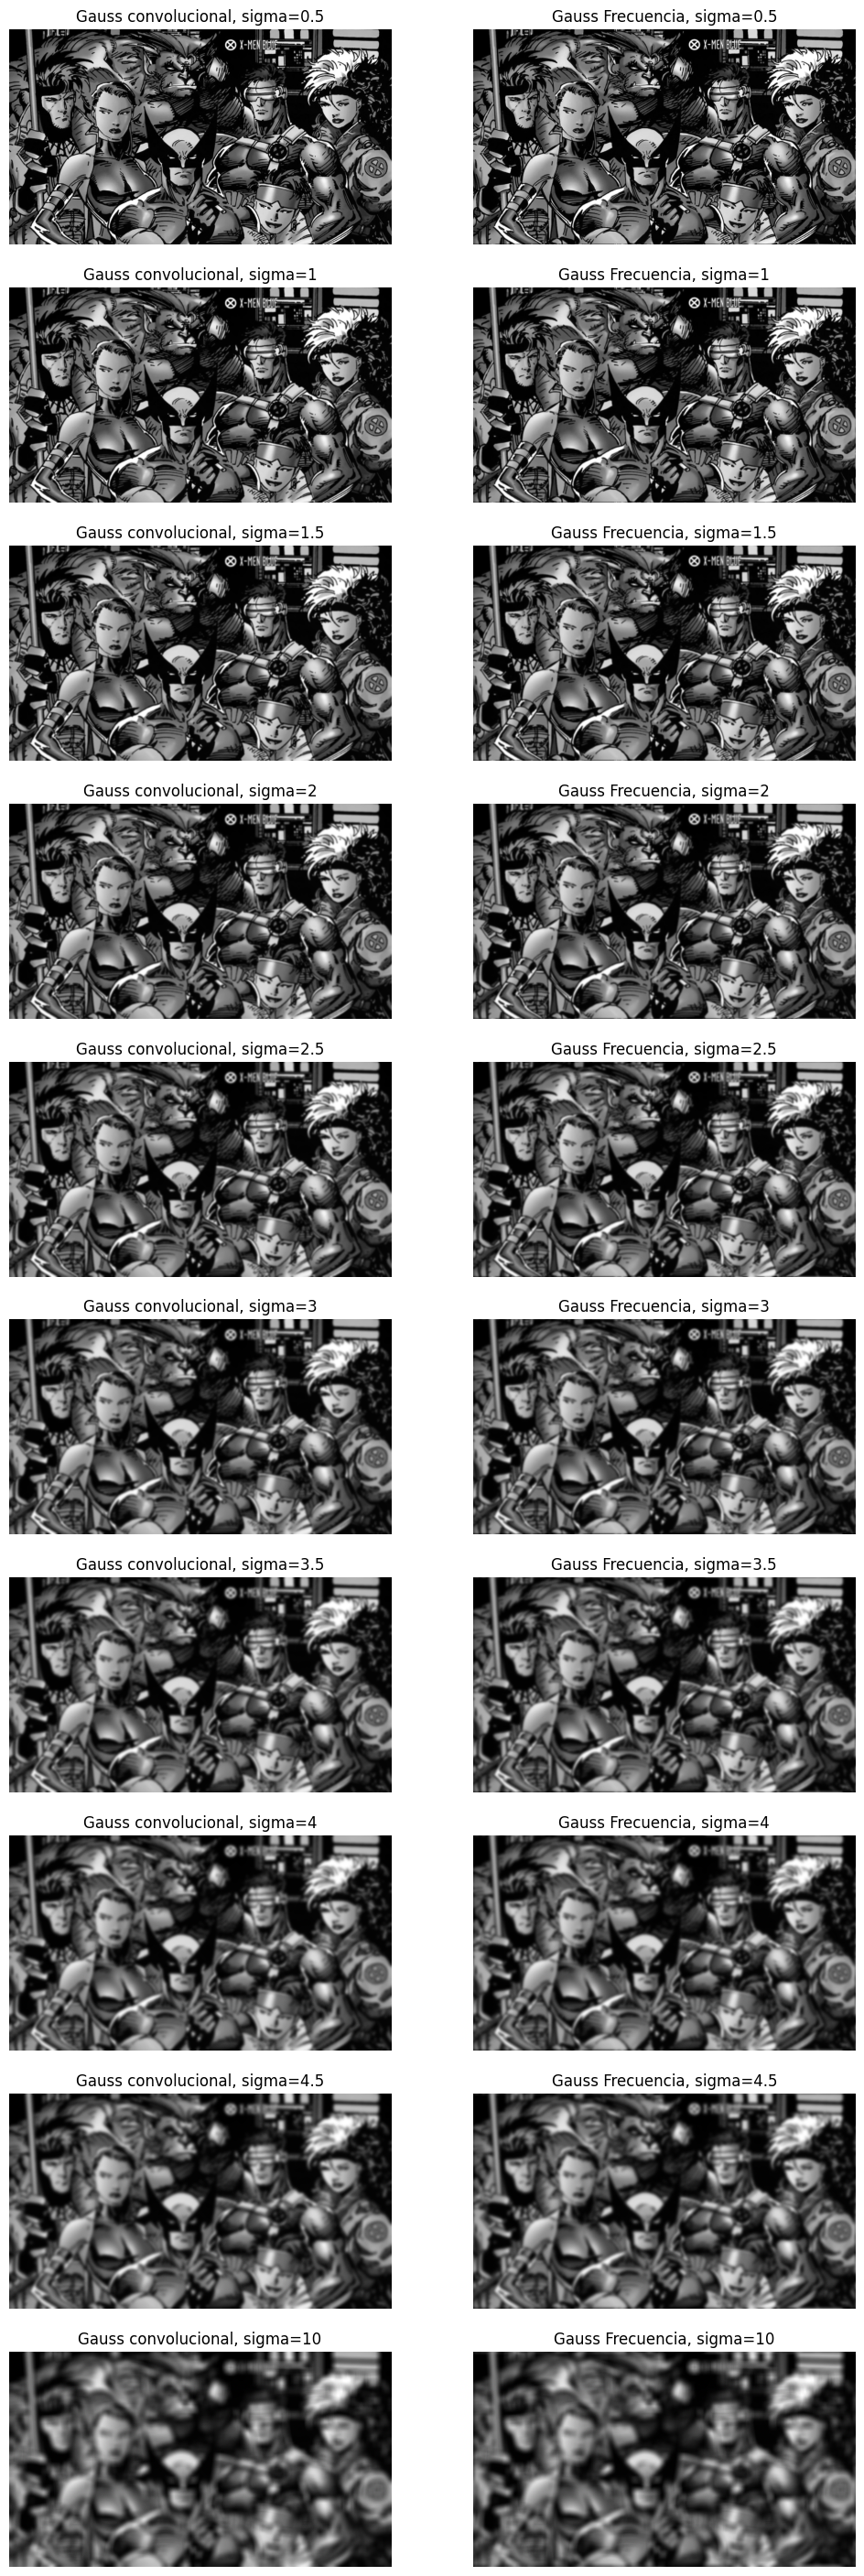

In [74]:
sigmas = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,10]
ker_size = 25
magma = cv.imread('X-Men.jpg', cv.IMREAD_GRAYSCALE)

quality_values_fft = [] 
quality_values_conv = [] 

plt.imshow(magma, cmap='gray') 
plt.figure(figsize=(12,36))

for i,sig in enumerate(sigmas):
 
 # "calidad" para la convolución
 img_conv = cv.GaussianBlur(magma,(ker_size,ker_size),sig)
 quality_values_conv.append(quality_measure(img_conv))
 # caliad para el filtrado fft
 img_fft = fourier_filter(magma,ker_size,sig)
 quality_values_fft.append(quality_measure(img_fft))

 plt.subplot(len(sigmas), 2, 2 * i + 1)
 plt.axis('off')
 plt.title(f"Gauss convolucional, sigma={sig}")
 plt.imshow(img_conv, cmap='gray')

 plt.subplot(len(sigmas), 2, 2 * i + 2)
 plt.axis('off')
 plt.title(f"Gauss Frecuencia, sigma={sig}")
 plt.imshow(img_fft, cmap='gray')



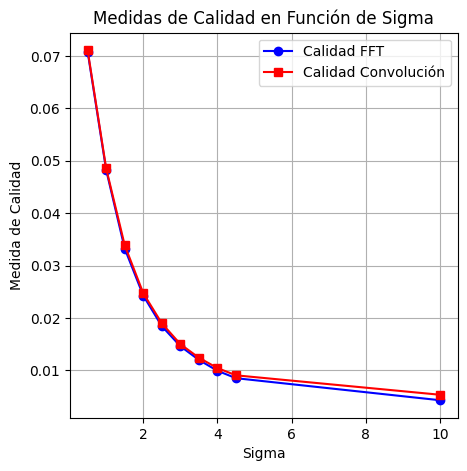

In [75]:

plt.figure(figsize=(5, 5))

# Graficar quality_values_fft
plt.plot(sigmas, quality_values_fft, marker='o', label='Calidad FFT', color='blue')

# Graficar quality_values_conv
plt.plot(sigmas, quality_values_conv, marker='s', label='Calidad Convolución', color='red')

# Añadir título y etiquetas
plt.title('Medidas de Calidad en Función de Sigma')
plt.xlabel('Sigma')
plt.ylabel('Medida de Calidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Punto 3

“Analysis of focus measure operators in shape-from-focus”

* Squared gradient (GRA4)

In [77]:
def focus_grad(image):
    
    # Calcular el gradiente en las direcciones x e y utilizando Sobel
    grad_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    grad_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
    
    # Calcular la magnitud del gradiente
    magnitud_gradiente = np.sqrt(np.square(grad_x) + np.square(grad_y))
    
    # Elevar al cuadrado la magnitud del gradiente para obtener la energía del gradiente de la imagen (GRAE)
    GRAE = np.square(magnitud_gradiente)
    
    # Calcular la nitidez promedio de la imagen
    nitidez = np.mean(GRAE)
    
    return nitidez

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

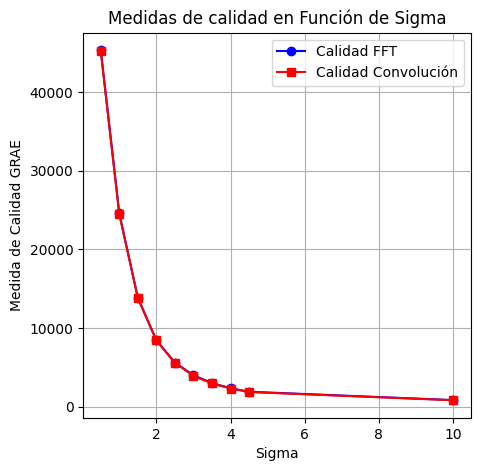

In [78]:
sigmas = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,10]
ker_size = 25
magma = cv.imread('X-Men.jpg', cv.IMREAD_GRAYSCALE)

grae_values_fft = [] 
grae_values_conv = [] 

for i,sig in enumerate(sigmas):
 
 # "calidad" para la convolución
 img_conv = cv.GaussianBlur(magma,(ker_size,ker_size),sig)
 grae_values_conv.append(focus_grad(img_conv))
 # caliad para el filtrado fft
 img_fft = fourier_filter(magma,ker_size,sig)
 grae_values_fft.append(focus_grad(img_fft))

 plt.figure(figsize=(5, 5))

# Graficar quality_values_fft
plt.plot(sigmas, grae_values_fft, marker='o', label='Calidad FFT', color='blue')

# Graficar quality_values_conv
plt.plot(sigmas, grae_values_conv, marker='s', label='Calidad Convolución', color='red')

# Añadir título y etiquetas
plt.title('Medidas de calidad en Función de Sigma')
plt.xlabel('Sigma')
plt.ylabel('Medida de Calidad GRAE')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()